<a href="https://colab.research.google.com/github/araldi/HS22_Big-Data-analysis-in-Biomedical-Research/blob/main/Week_06/09_LinearModels_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimizing the objective functions

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://github.com/araldi/HS21---Big-Data-Analysis-in-Biomedical-Research-376-1723-00L-/blob/main/Week5/Week5_statistics_exercise.csv?raw=true')
dictionary = pd.read_csv('https://raw.githubusercontent.com/araldi/HS21---Big-Data-Analysis-in-Biomedical-Research-376-1723-00L-/main/Week3/Week3_homework_dictionary_part1.csv')

Let's check the relationship between IGF-1 and age.

In [ ]:
df

,Unnamed: 0,eid,31-0.0,48-0.0,49-0.0,50-0.0,2443-0.0,21002-0.0,21022-0.0,23099-0.0,30740-0.0,30750-0.0,30760-0.0,30770-0.0,30780-0.0
0,281147,3811815,0.0,94.0,109.0,161.0,0.0,84.1,54.0,46.9,5.032,35.6,1.287,24.253,4.501
1,51158,1511686,0.0,67.0,96.0,160.0,0.0,61.9,41.0,28.6,3.671,31.7,1.059,22.127,5.275
2,167746,2677649,0.0,78.0,108.0,167.5,0.0,69.2,55.0,34.7,5.234,25.5,1.423,19.969,3.603
3,381947,4820009,1.0,88.0,101.0,184.0,0.0,79.5,45.0,14.1,4.665,35.1,2.018,28.842,3.060
4,114270,2142869,0.0,76.0,98.0,156.0,0.0,59.0,60.0,25.4,5.192,40.1,1.581,24.269,5.010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,60241,1602525,0.0,77.0,94.0,157.0,0.0,60.3,64.0,27.3,5.204,37.7,1.417,11.937,4.052
19996,198676,2986962,0.0,83.0,100.0,162.0,0.0,64.7,69.0,32.3,3.819,35.1,1.659,21.855,4.210
19997,499901,5999687,0.0,85.0,100.0,158.0,0.0,66.2,61.0,38.4,4.806,38.5,1.617,21.763,4.117
19998,250805,3508340,1.0,94.0,100.0,171.0,0.0,79.6,60.0,22.9,4.948,32.5,1.231,28.655,2.652


In [ ]:
dictionary


,Description,Code
0,PatientID,eid
1,Gender,31-0.0
2,Height [cm],50-0.0
3,Weight [Kg],21002-0.0
4,Waist circumference [cm],48-0.0
5,Hip circumference [cm],49-0.0
6,Body_fat_percentage [%],23099-0.0
7,Diabetes diagnosed by doctor,2443-0.0
8,AgeRecruit,21022-0.0
9,Glucose [mmol/L],30740-0.0


In [3]:
df.dropna(subset = ['21022-0.0', '30770-0.0'], inplace =True)

In [ ]:
df

,Unnamed: 0,eid,31-0.0,48-0.0,49-0.0,50-0.0,2443-0.0,21002-0.0,21022-0.0,23099-0.0,30740-0.0,30750-0.0,30760-0.0,30770-0.0,30780-0.0
0,281147,3811815,0.0,94.0,109.0,161.0,0.0,84.1,54.0,46.9,5.032,35.6,1.287,24.253,4.501
1,51158,1511686,0.0,67.0,96.0,160.0,0.0,61.9,41.0,28.6,3.671,31.7,1.059,22.127,5.275
2,167746,2677649,0.0,78.0,108.0,167.5,0.0,69.2,55.0,34.7,5.234,25.5,1.423,19.969,3.603
3,381947,4820009,1.0,88.0,101.0,184.0,0.0,79.5,45.0,14.1,4.665,35.1,2.018,28.842,3.060
4,114270,2142869,0.0,76.0,98.0,156.0,0.0,59.0,60.0,25.4,5.192,40.1,1.581,24.269,5.010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,60241,1602525,0.0,77.0,94.0,157.0,0.0,60.3,64.0,27.3,5.204,37.7,1.417,11.937,4.052
19996,198676,2986962,0.0,83.0,100.0,162.0,0.0,64.7,69.0,32.3,3.819,35.1,1.659,21.855,4.210
19997,499901,5999687,0.0,85.0,100.0,158.0,0.0,66.2,61.0,38.4,4.806,38.5,1.617,21.763,4.117
19998,250805,3508340,1.0,94.0,100.0,171.0,0.0,79.6,60.0,22.9,4.948,32.5,1.231,28.655,2.652


Text(0, 0.5, 'IGF-1 [nmol/L]')

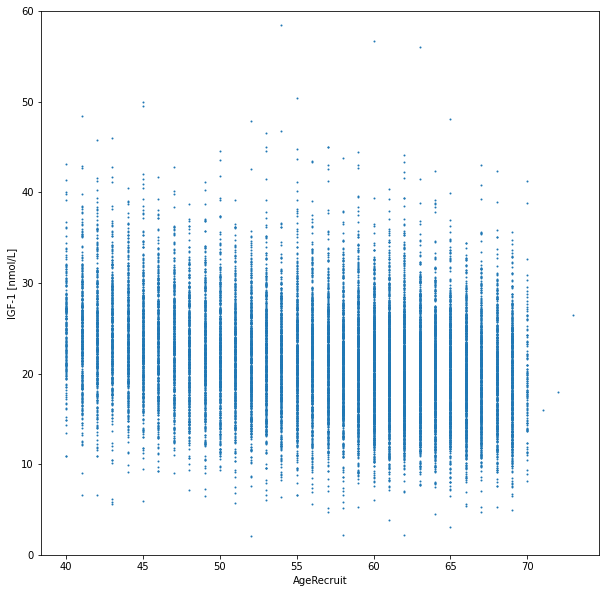

In [ ]:
# Let's look at the data
plt.figure(figsize = (10,10))
plt.scatter(df['21022-0.0'], df['30770-0.0'], s=1)
plt.ylim(0, 60)
plt.xlabel(dictionary.loc[dictionary['Code']== '21022-0.0', 'Description'].values[0] )
plt.ylabel(dictionary.loc[dictionary['Code']== '30770-0.0', 'Description'].values[0])

In [ ]:
from scipy.optimize import minimize

def line(x, b, a): #function to minimize
    return a * x + b #line equation

def fitfunc(args, x, y):
    a, b = args
    return sum((y - line(a, b, x))**2) # L2 objective function
 
x = df['21022-0.0']
y = df['30770-0.0']
initialGuess = (-1, 40)
 
fitfunc(initialGuess, x, y)
solution = minimize(fitfunc, initialGuess, args=(x, y)) # minimize the objective function

In [ ]:
solution

      fun: 560153.5217405596
 hess_inv: array([[ 1.83367973e-07, -1.01152303e-05],
       [-1.01152303e-05,  5.84041317e-04]])
      jac: array([-0.6796875,  0.0078125])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 159
      nit: 8
     njev: 50
   status: 2
  success: False
        x: array([-0.17716481, 31.45313501])

In [ ]:
a, b = solution['x'][0], solution['x'][1]

Text(0.5, 1.0, 'Linear relationship between IGF-1 and age')

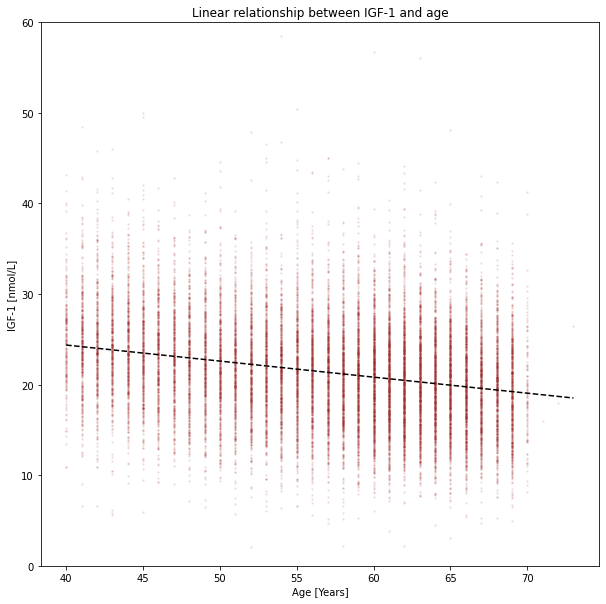

In [ ]:
plt.figure(figsize = (10,10))
plt.scatter(df['21022-0.0'], df['30770-0.0'], s=2, c='brown', alpha = 0.1)
plt.ylim(0, 60)

x = np.linspace(df['21022-0.0'].min(), df['21022-0.0'].max())
y = a * x + b

plt.plot(x, y, color = 'k', linestyle = '--')
plt.xlabel('Age [Years]')
plt.ylabel('IGF-1 [nmol/L]')
plt.title('Linear relationship between IGF-1 and age')

In [ ]:
def line(a, b, c, x): #function to minimize
    return a * x**2 + b * x + c #second order equation

def fitfunc(args, x, y):
    a, b, c = args
    return sum((y - line(a, b, c, x))**2) # L2 objective function
                                          # sum of squared residuals
 
x = df['21022-0.0']
y = df['30770-0.0']
initialGuess = (1, 1, 1)
 
fitfunc(initialGuess, x, y)
solution = minimize(fitfunc, initialGuess, args=(x, y)) # minimize the objective function

In [ ]:
solution

      fun: 559387.1288698822
 hess_inv: array([[ 7.99289181e-09, -8.84998506e-07,  2.39551029e-05],
       [-8.84998506e-07,  9.83990098e-05, -2.67559753e-03],
       [ 2.39551029e-05, -2.67559753e-03,  7.31372444e-02]])
      jac: array([-2.00672656e+03, -3.28671875e+01,  2.73437500e-01])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 228
      nit: 8
     njev: 54
   status: 2
  success: False
        x: array([ 3.24495588e-03, -5.35837459e-01,  4.11447540e+01])

Text(0.5, 1.0, 'Second order relationship between IGF-1 and age')

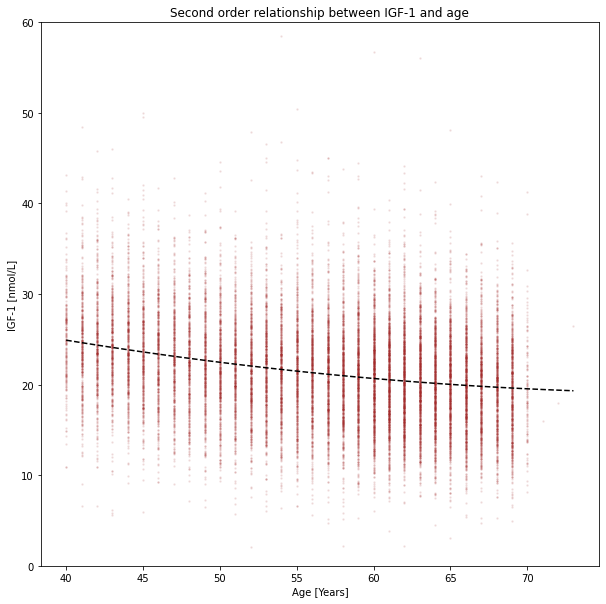

In [ ]:
a, b, c = solution['x'][0], solution['x'][1], solution['x'][2]

x = df['21022-0.0']
y = df['30770-0.0']

plt.figure(figsize = (10,10))
plt.scatter(df['21022-0.0'], df['30770-0.0'], s=2, c='brown', alpha = 0.1)
plt.ylim(0, 60)

x = np.linspace(df['21022-0.0'].min(), df['21022-0.0'].max())
y = a * x**2 + b * x + c

plt.plot(x, y, color = 'k', linestyle = '--')
plt.xlabel('Age [Years]')
plt.ylabel('IGF-1 [nmol/L]')
plt.title('Second order relationship between IGF-1 and age')

### Use np.polyfit

In [ ]:
# first order with polyfit
x = df['21022-0.0']
y = df['30770-0.0']
args = np.polyfit(x,y,1)

Text(0.5, 1.0, 'Linear relationship between IGF-1 and age')

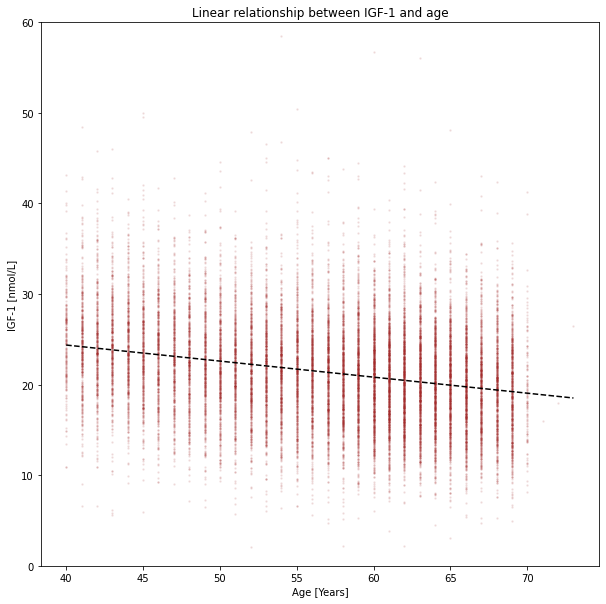

In [ ]:
a, b = args
plt.figure(figsize = (10,10))
plt.scatter(df['21022-0.0'], df['30770-0.0'], s=2, c='brown', alpha = 0.1)
plt.ylim(0, 60)

x = np.linspace(df['21022-0.0'].min(), df['21022-0.0'].max())
y = a * x + b

plt.plot(x, y, color = 'k', linestyle = '--')
plt.xlabel('Age [Years]')
plt.ylabel('IGF-1 [nmol/L]')
plt.title('Linear relationship between IGF-1 and age')

In [ ]:
# second order with polyfit
x = df['21022-0.0']
y = df['30770-0.0']
args = np.polyfit(x,y,2)

Text(0.5, 1.0, 'Second order relationship between IGF-1 and age')

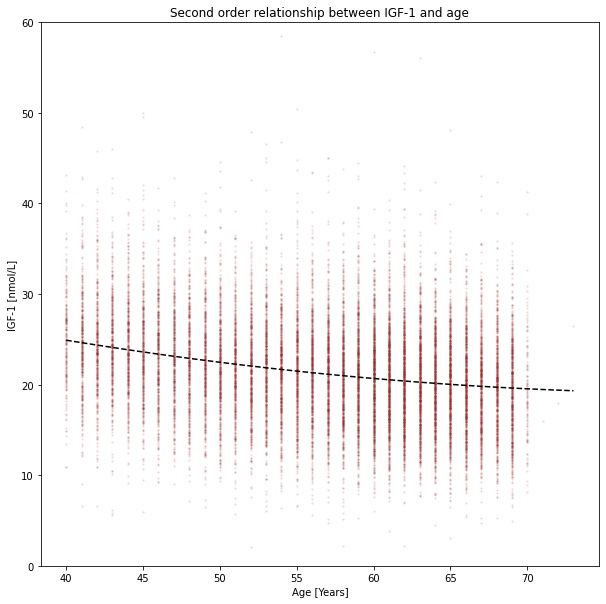

In [ ]:
a, b, c = args

plt.figure(figsize = (10,10))
plt.scatter(df['21022-0.0'], df['30770-0.0'], s=2, c='brown', alpha = 0.1)
plt.ylim(0, 60)

x = np.linspace(df['21022-0.0'].min(), df['21022-0.0'].max())
y = a * x**2 + b * x + c

plt.plot(x, y, color = 'k', linestyle = '--')
plt.xlabel('Age [Years]')
plt.ylabel('IGF-1 [nmol/L]')
plt.title('Second order relationship between IGF-1 and age')

# Multiple linear regression

## Rename the columns

In [51]:
dictionary['Description_cols'] = dictionary['Description'].str.split(' ').str[0]

In [52]:
dict_columns = {}
for index, value in enumerate(dictionary['Code']):
  dict_columns[value] = dictionary.loc[index, "Description_cols"]

In [53]:
df.rename(columns = dict_columns, inplace = True)

In [54]:
dictionary

,Description,Code,Description_cols
0,PatientID,eid,PatientID
1,Gender,31-0.0,Gender
2,Height [cm],50-0.0,Height
3,Weight [Kg],21002-0.0,Weight
4,Waist circumference [cm],48-0.0,Waist
5,Hip circumference [cm],49-0.0,Hip
6,Body_fat_percentage [%],23099-0.0,Body_fat_percentage
7,Diabetes diagnosed by doctor,2443-0.0,Diabetes
8,AgeRecruit,21022-0.0,AgeRecruit
9,Glucose [mmol/L],30740-0.0,Glucose


In [55]:
# prepare the data
df = df.dropna()

In [ ]:
df

,Unnamed: 0,PatientID,Gender,Waist,Hip,Height,Diabetes,Weight,AgeRecruit,Body_fat_percentage,Glucose,Glycated,HDL,IGF-1,LDL
0,281147,3811815,0.0,94.0,109.0,161.0,0.0,84.1,54.0,46.9,5.032,35.6,1.287,24.253,4.501
1,51158,1511686,0.0,67.0,96.0,160.0,0.0,61.9,41.0,28.6,3.671,31.7,1.059,22.127,5.275
2,167746,2677649,0.0,78.0,108.0,167.5,0.0,69.2,55.0,34.7,5.234,25.5,1.423,19.969,3.603
3,381947,4820009,1.0,88.0,101.0,184.0,0.0,79.5,45.0,14.1,4.665,35.1,2.018,28.842,3.060
4,114270,2142869,0.0,76.0,98.0,156.0,0.0,59.0,60.0,25.4,5.192,40.1,1.581,24.269,5.010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,60241,1602525,0.0,77.0,94.0,157.0,0.0,60.3,64.0,27.3,5.204,37.7,1.417,11.937,4.052
19996,198676,2986962,0.0,83.0,100.0,162.0,0.0,64.7,69.0,32.3,3.819,35.1,1.659,21.855,4.210
19997,499901,5999687,0.0,85.0,100.0,158.0,0.0,66.2,61.0,38.4,4.806,38.5,1.617,21.763,4.117
19998,250805,3508340,1.0,94.0,100.0,171.0,0.0,79.6,60.0,22.9,4.948,32.5,1.231,28.655,2.652


## Test the assumptions

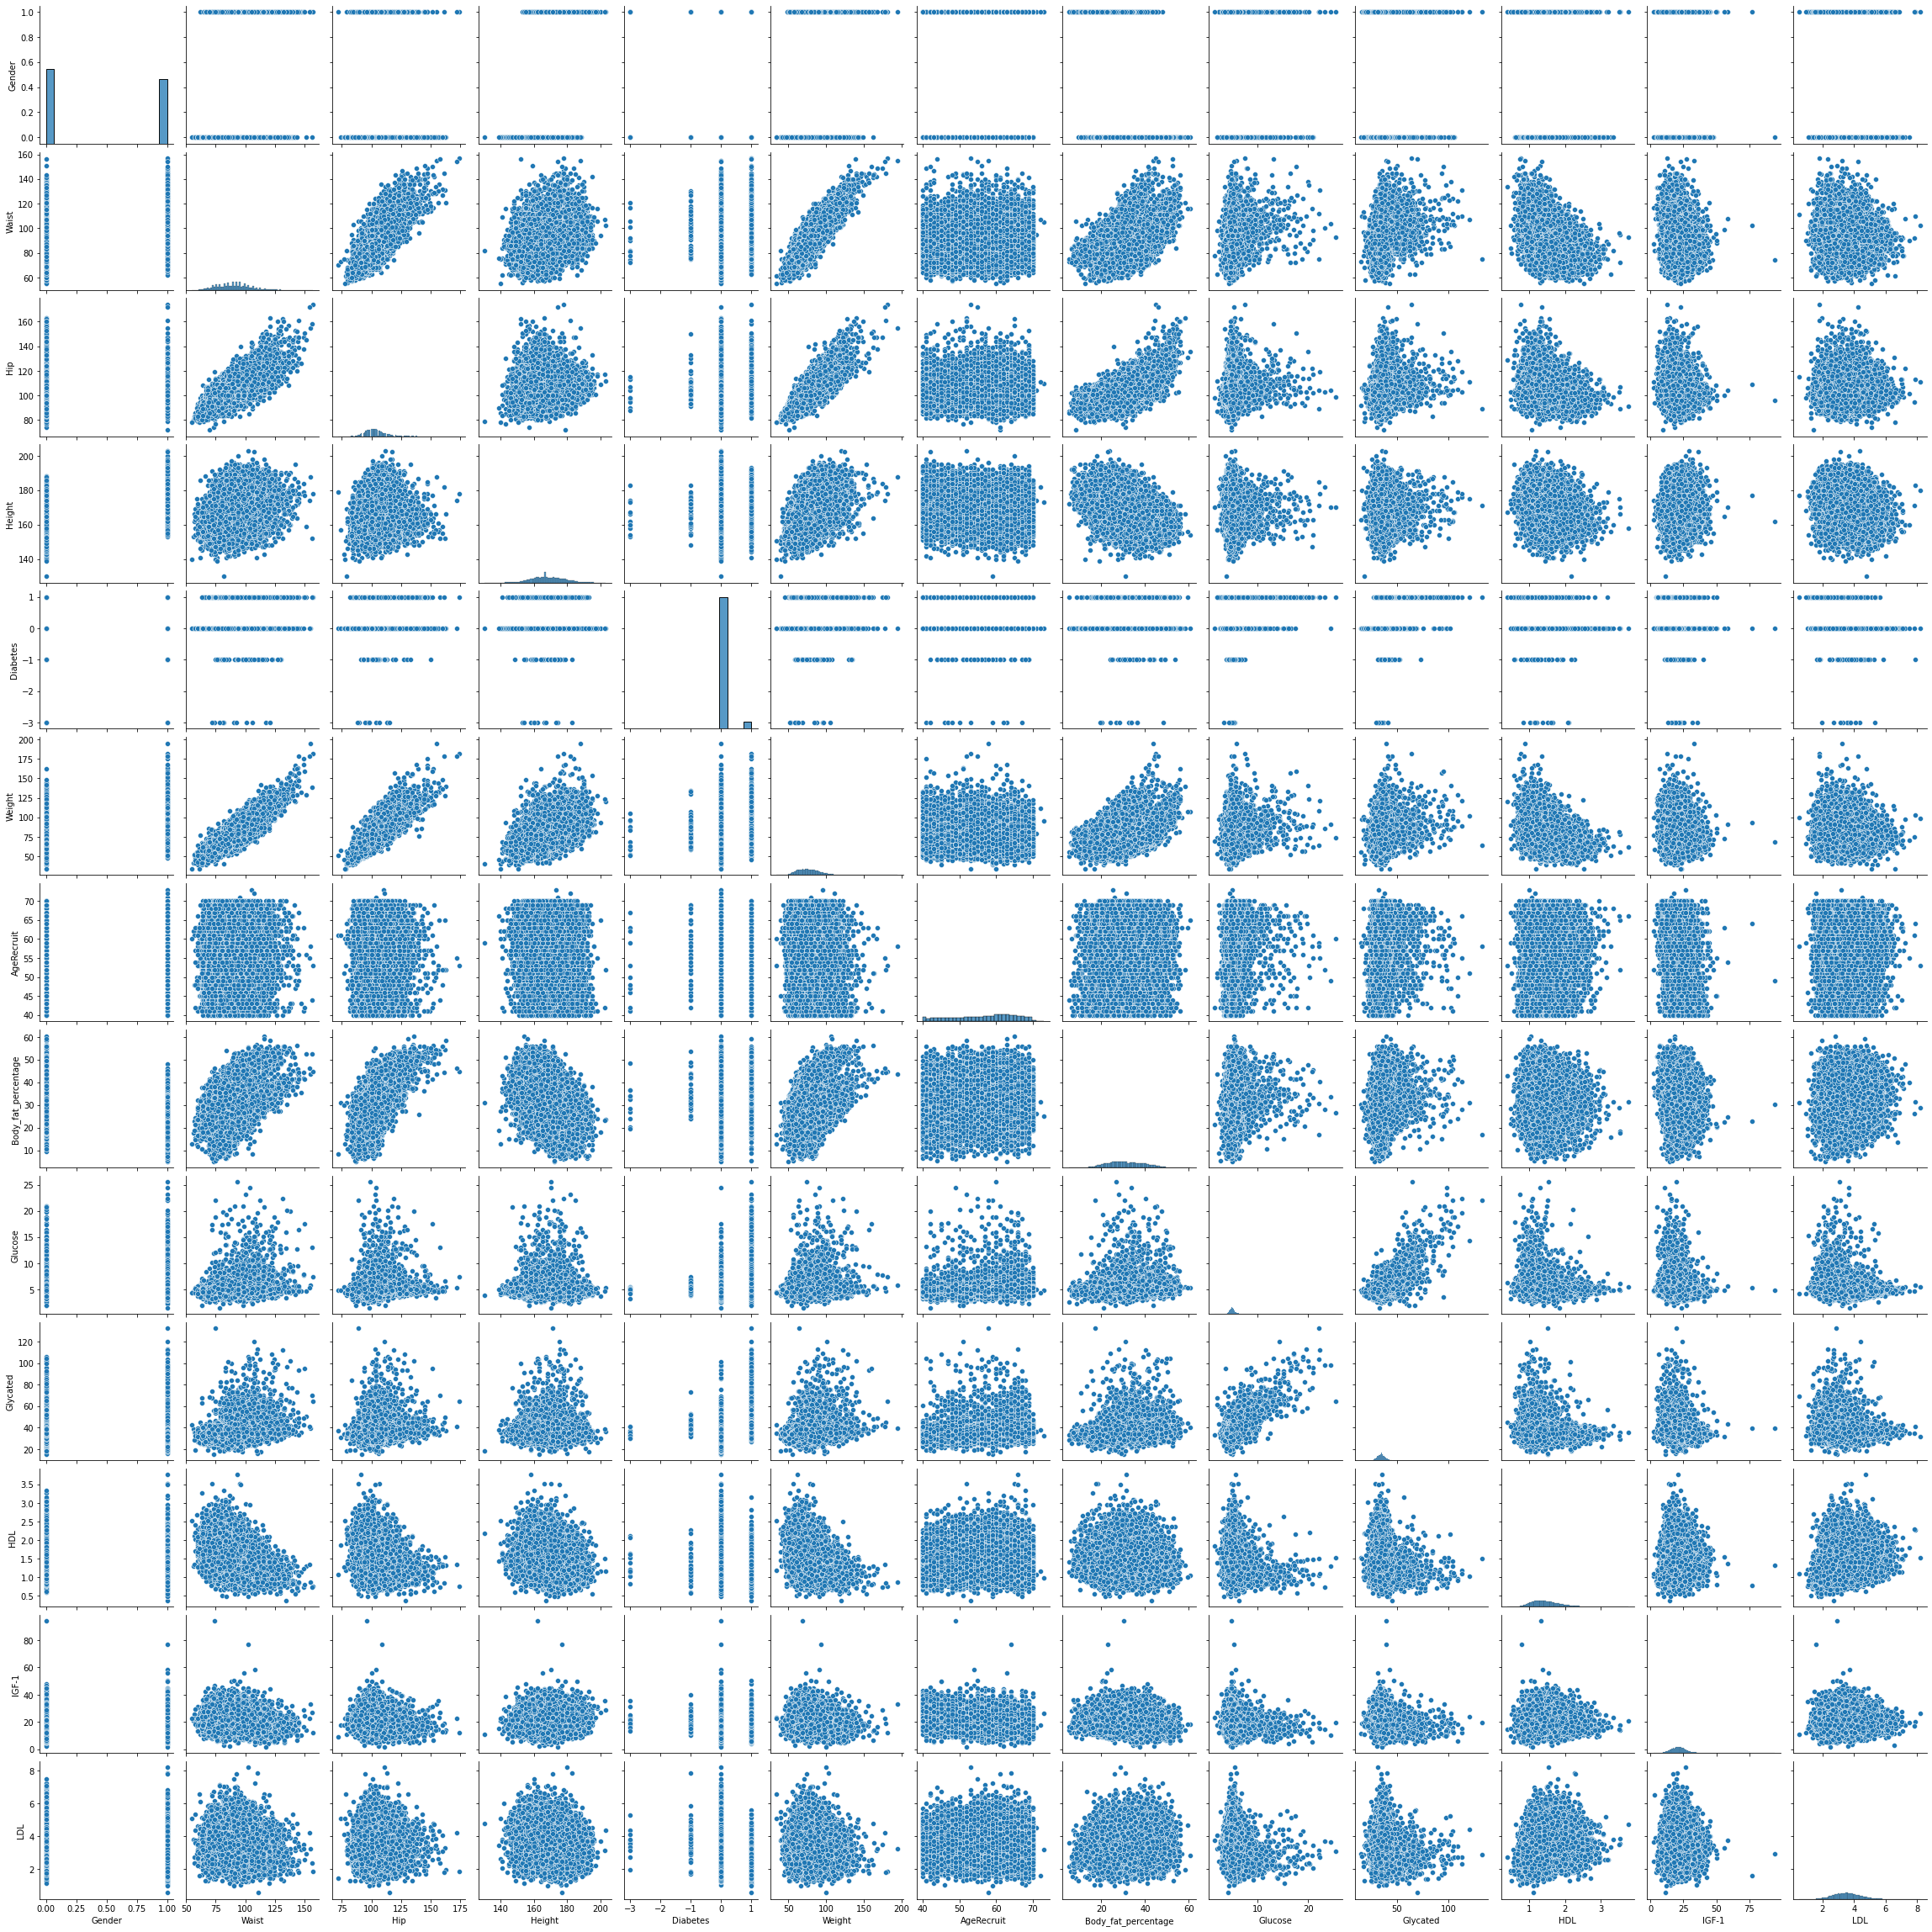

In [ ]:
# check correlation between variables

sns.pairplot(df.select_dtypes(exclude = 'int64'))
# took 2 minutes to run

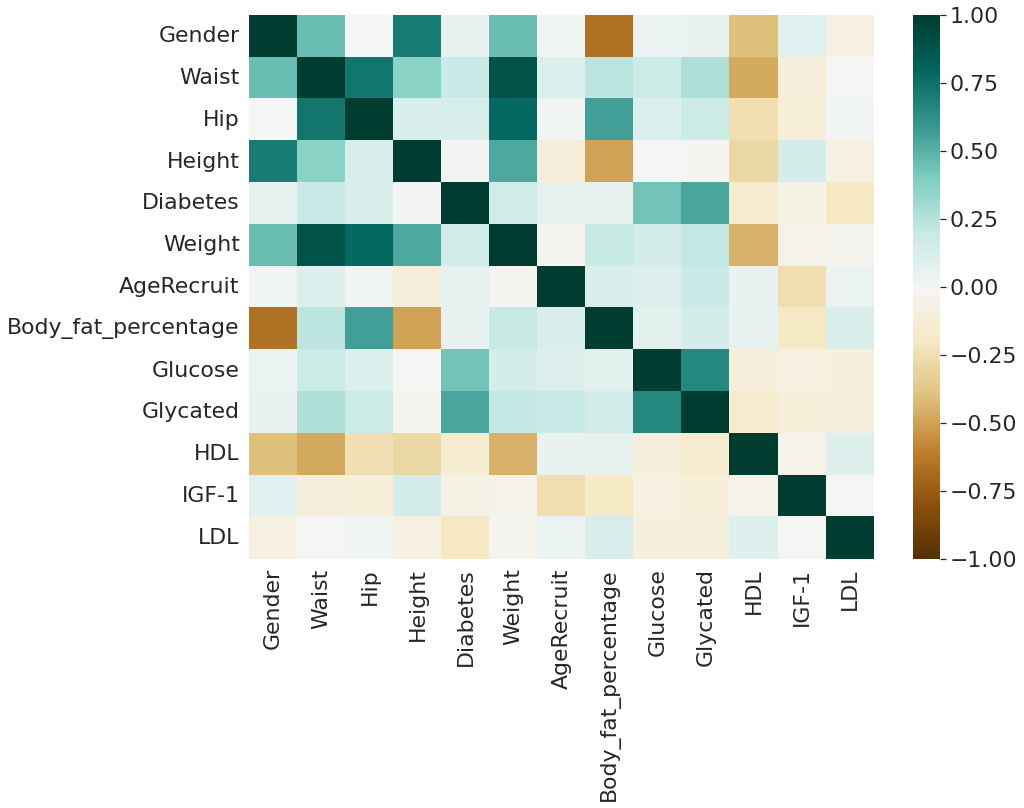

In [ ]:
import seaborn as sns
# Plot heatmap for feature correlation
plt.figure(figsize = (14,10))
sns.set(font_scale = 2)
s = sns.heatmap(df.select_dtypes(exclude = 'int64').corr(), vmin=-1, vmax=1, cmap='BrBG')


## Prepare the data

In [58]:
# create categorical columns 
df['Diabetes'] = np.select([df['Diabetes']== -1, df['Diabetes']== -3], [ np.nan,  np.nan], default = df['Diabetes'])
df.dropna(subset=['Diabetes'], inplace =True)

In [59]:
df['Diabetes'].value_counts()

0.0    14974
1.0      831
Name: Diabetes, dtype: int64

In [60]:
df['Diabetes'] = np.select([df['Diabetes']==  1,df['Diabetes']==  0 ], [ 'Yes', 'No'])
df['Gender'] = np.select([df['Gender']==0,df['Gender']==1], ['Females', 'Males'])


In [61]:
df['Diabetes'].value_counts()

No     14974
Yes      831
Name: Diabetes, dtype: int64

In [64]:
# standardize the data, but only for quantitative columns
def standardize(x):
  return (x - np.mean(x))/np.std(x)

In [65]:
# standardize the data, but only for quantitative columns
df_stand = df.copy()
for i in df_stand.select_dtypes(exclude = ['int64', 'object']):
  df_stand[i] = standardize(df_stand[i])


In [67]:
df_stand

,Unnamed: 0,PatientID,Gender,Waist,Hip,Height,Diabetes,Weight,AgeRecruit,Body_fat_percentage,Glucose,Glycated,HDL,IGF-1,LDL
0,281147,3811815,Females,0.271666,0.616904,-0.816307,No,0.370664,-0.326378,1.817971,-0.079549,-0.070975,-0.431550,0.508824,1.072989
1,51158,1511686,Females,-1.735219,-0.802706,-0.924249,No,-1.018833,-1.931780,-0.322980,-1.150518,-0.645994,-1.027182,0.132449,1.962591
2,167746,2677649,Females,-0.917599,0.507703,-0.114682,No,-0.561927,-0.202886,0.390671,0.079404,-1.560127,-0.076261,-0.249590,0.040867
3,381947,4820009,Males,-0.174308,-0.256702,1.666364,No,0.082750,-1.437810,-2.019362,-0.368341,-0.144695,1.478129,1.321233,-0.583233
4,114270,2142869,Females,-1.066257,-0.584304,-1.356018,No,-1.200344,0.414577,-0.697354,0.046355,0.592508,0.336501,0.511656,1.658011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,60241,1602525,Females,-0.991928,-1.021107,-1.248076,No,-1.118977,0.908547,-0.475069,0.055797,0.238651,-0.091936,-1.671528,0.556928
19996,198676,2986962,Females,-0.545953,-0.365903,-0.708365,No,-0.843581,1.526009,0.109890,-1.034057,-0.144695,0.540270,0.084296,0.738526
19997,499901,5999687,Females,-0.397295,-0.365903,-1.140134,No,-0.749696,0.538069,0.823540,-0.257388,0.356603,0.430548,0.068009,0.631636
19998,250805,3508340,Males,0.271666,-0.365903,0.263115,No,0.089009,0.414577,-0.989833,-0.145649,-0.528041,-0.577846,1.288128,-1.052170


In [68]:
df_stand.select_dtypes(exclude = 'int64'). describe()

,Waist,Hip,Height,Weight,AgeRecruit,Body_fat_percentage,Glucose,Glycated,HDL,IGF-1,LDL
count,1.580500e+04,1.580500e+04,1.580500e+04,1.580500e+04,1.580500e+04,1.580500e+04,1.580500e+04,1.580500e+04,1.580500e+04,1.580500e+04,1.580500e+04
mean,7.433612e-16,-3.567325e-16,7.920270e-16,-5.284676e-16,4.513666e-16,-1.627437e-16,-5.608365e-17,8.449637e-16,3.124500e-16,-9.890503e-17,2.697410e-18
std,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00
min,-2.627167e+00,-3.423524e+00,-4.162516e+00,-2.765093e+00,-2.055273e+00,-3.072288e+00,-2.825825e+00,-3.019790e+00,-2.801016e+00,-3.416907e+00,-3.472714e+00
25%,-6.946116e-01,-6.935051e-01,-7.083646e-01,-7.309195e-01,-8.203480e-01,-7.324512e-01,-4.139810e-01,-4.838090e-01,-7.267538e-01,-6.852710e-01,-7.096622e-01
50%,-2.564999e-02,-1.475014e-01,-6.071127e-02,-1.112790e-01,1.675919e-01,-4.219923e-02,-1.558783e-01,-1.299512e-01,-1.285096e-01,-1.732143e-02,-3.843824e-02
75%,6.433116e-01,5.077031e-01,6.948843e-01,5.959873e-01,7.850544e-01,7.299470e-01,1.384218e-01,2.533947e-01,6.055805e-01,6.097333e-01,6.534741e-01
max,4.954397e+00,7.714953e+00,3.717267e+00,7.311888e+00,2.019979e+00,3.409060e+00,1.601725e+01,1.417180e+01,6.034190e+00,1.285288e+01,5.333652e+00


## Create the linear regression models

#### With unstandardized data first

In [9]:
# importing module
import statsmodels.api as sm
import statsmodels.formula.api as smf

# fitting the (unstandardize) data 
mod = smf.ols(formula='Glycated ~ Glucose', data=df)

res = mod.fit()
res.summary()

# note how big is the Glucose coefficient

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Glycated   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                 1.222e+04
Date:                Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:51:59   Log-Likelihood:                -48337.
No. Observations:               15858   AIC:                         9.668e+04
Df Residuals:                   15856   BIC:                         9.669e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.9901      0.169    106.654      0.000      17.659      18.321
Glucose        3.5264      0.032    110.558      0.000       3.464       3.589
==============================================================================
Omnibus:                     6260.873   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            87354.369
Skew:                           1.511   Prob(JB):                         0.00
Kurtosis:                      14.094   Cond. No.                         22.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

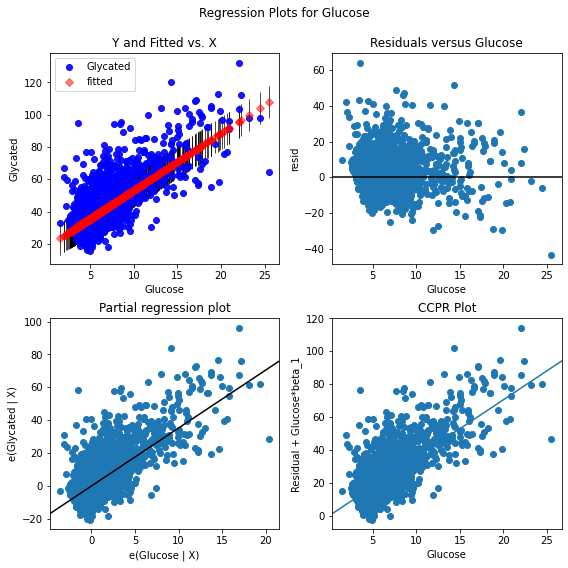

In [10]:
import statsmodels.api as sm

# Check the residuals for glucose
# according to assumptions, they have to be normally distributed

#define figure size
fig = plt.figure(figsize=(8,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(res, 'Glucose', fig=fig)
plt.show()

### Use standardized data

In [69]:
# importing module
import statsmodels.api as sm
import statsmodels.formula.api as smf

# fitting the data
mod = smf.ols(formula='Glycated ~ Glucose', data=df_stand)

res = mod.fit()
res.summary()

# note that the coefficient for glucose is much smaller, yet the R-squared 
# and p-values do not change


# in this way we can compare multiple features even if they have different numerical distribution 
# or units of measure

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Glycated   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                 1.223e+04
Date:                Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                        19:06:30   Log-Likelihood:                -17897.
No. Observations:               15805   AIC:                         3.580e+04
Df Residuals:                   15803   BIC:                         3.581e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.551e-16      0.006   1.43e-13      1.000      -0.012       0.012
Glucose        0.6605      0.006    110.581      0.000       0.649       0.672
==============================================================================
Omnibus:                     6235.081   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            87527.841
Skew:                           1.508   Prob(JB):                         0.00
Kurtosis:                      14.127   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Exercise
Play around with independent variables to get the best possible model that describes (and predicts) glucose and LDL

In [ ]:
# example

# Notice in the formulat that IGF-1, since it has a - in its name, 
# needs to be used with the Q("") notation
mod = smf.ols(formula='Glucose ~  Glycated + Q("IGF-1") + AgeRecruit', data=df)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Glucose   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     4085.
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:33:34   Log-Likelihood:                -17961.
No. Observations:               15858   AIC:                         3.593e+04
Df Residuals:                   15854   BIC:                         3.596e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.301e-17      0.006  -1.22e-14      1.000      -0.012       0.012
Glycated       0.6629      0.006    108.813      0.000       0.651       0.675
Q("IGF-1")    -0.0157      0.006     -2.544      0.011      -0.028      -0.004
AgeRecruit    -0.0254      0.006     -4.056      0.000      -0.038      -0.013
==============================================================================
Omnibus:                    10332.079   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           454032.795
Skew:                           2.545   Prob(JB):                         0.00
Kurtosis:                      28.715   Cond. No.                         1.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
# example

mod = smf.ols(formula='Glucose ~  Glycated + Q("IGF-1") + AgeRecruit + Diabetes' , data=df)
res = mod.fit()
res.summary()

# notice that the coef+pvalue of Diabetes, since it is a categorical variable, 
# is calculated using the value "No" as reference (because it is the first value alphabetically)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Glucose   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     3195.
Date:                Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                        19:07:34   Log-Likelihood:                -21530.
No. Observations:               15805   AIC:                         4.307e+04
Df Residuals:                   15800   BIC:                         4.311e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.3707      0.080     17.129      0.000       1.214       1.528
Diabetes[T.Yes]     0.7202      0.042     17.110      0.000       0.638       0.803
Glycated            0.1100      0.001     78.093      0.000       0.107       0.113
Q("IGF-1")         -0.0030      0.001     -2.154      0.031      -0.006      -0.000
AgeRecruit         -0.0032      0.001     -3.301      0.001      -0.005      -0.001
==============================================================================
Omnibus:                    10008.138   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           467470.569
Skew:                           2.416   Prob(JB):                         0.00
Kurtosis:                      29.201   Cond. No.                         768.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Continue by adding other variables in the model